In [2]:
import networkx as nx
import math

# Coordinates (required only for A*)
positions = {
    "A": (0, 0),
    "B": (1, 0),
    "C": (0, 1),
    "D": (1, 1),
    "E": (2, 1),
}

# Sample road network
edges = [
    ("A", "B", 5),
    ("A", "C", 10),
    ("B", "D", 7),
    ("C", "D", 3),
    ("D", "E", 4),
]

# Road conditions from CNN + LSTM (example)
road_conditions = {
    ("A", "B"): {"status": "NotBlocked", "traffic": 300},
    ("A", "C"): {"status": "NotBlocked", "traffic": 600},
    ("B", "D"): {"status": "Blocked", "traffic": 200},  # Blocked
    ("C", "D"): {"status": "NotBlocked", "traffic": 100},
    ("D", "E"): {"status": "NotBlocked", "traffic": 450},
}

traffic_threshold = 500


# Heuristic function for A* (Euclidean)
def euclidean_heuristic(n1, n2):
    x1, y1 = positions[n1]
    x2, y2 = positions[n2]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)


# Main function
def get_best_route(source, target, use_astar=False):
    G = nx.Graph()

    # Add edges with initial weights
    for u, v, base_weight in edges:
        # Get road condition
        info = road_conditions.get((u, v)) or road_conditions.get((v, u)) or {}
        status = info.get("status", "NotBlocked")
        traffic = info.get("traffic", 0)

        # Adjust weight based on CNN + LSTM
        if status == "Blocked":
            weight = float('inf')  # Blocked = avoid
        elif traffic > traffic_threshold:
            weight = base_weight * 2  # High traffic = penalize
        else:
            weight = base_weight

        G.add_edge(u, v, weight=weight)

    # Use selected algorithm
    try:
        if use_astar:
            path = nx.astar_path(G, source, target, heuristic=euclidean_heuristic, weight='weight')
            algo = "A*"
        else:
            path = nx.dijkstra_path(G, source, target, weight='weight')
            algo = "Dijkstra"
        print(f"Best Route using {algo}: {path}")
        return path
    except nx.NetworkXNoPath:
        print(" No available route due to blocked roads.")
        return None


# 🔹 Example usage
get_best_route("A", "E", use_astar=False)  # Dijkstra
get_best_route("A", "E", use_astar=True)   # A*


Best Route using Dijkstra: ['A', 'C', 'D', 'E']
Best Route using A*: ['A', 'C', 'D', 'E']


['A', 'C', 'D', 'E']

In [4]:
road_conditions = {
    ('A', 'B'): {'status': 'Blocked', 'traffic': 600},
    ('A', 'C'): {'status': 'NotBlocked', 'traffic': 200},
    ('C', 'D'): {'status': 'NotBlocked', 'traffic': 300},
    ('D', 'E'): {'status': 'NotBlocked', 'traffic': 400},
}

# Apply logic
G = nx.Graph()
for (u, v), cond in road_conditions.items():
    if cond['status'] == 'Blocked':
        continue  # or G.add_edge(u, v, weight=9999)
    else:
        traffic = cond['traffic']
        traffic_weight = 1 + (traffic / 1000)  # normalize
        G.add_edge(u, v, weight=traffic_weight)


In [5]:
import networkx as nx

# Run Dijkstra or A* on this graph G
start, end = 'A', 'E'
dijkstra_path = nx.dijkstra_path(G, start, end)
print("Best Route using Dijkstra:", dijkstra_path)

# Optionally, with heuristics for A*
def heuristic(u, v):
    return 0  # placeholder; replace with Euclidean if you have coordinates

a_star_path = nx.astar_path(G, start, end, heuristic=heuristic)
print("Best Route using A*:", a_star_path)

Best Route using Dijkstra: ['A', 'C', 'D', 'E']
Best Route using A*: ['A', 'C', 'D', 'E']


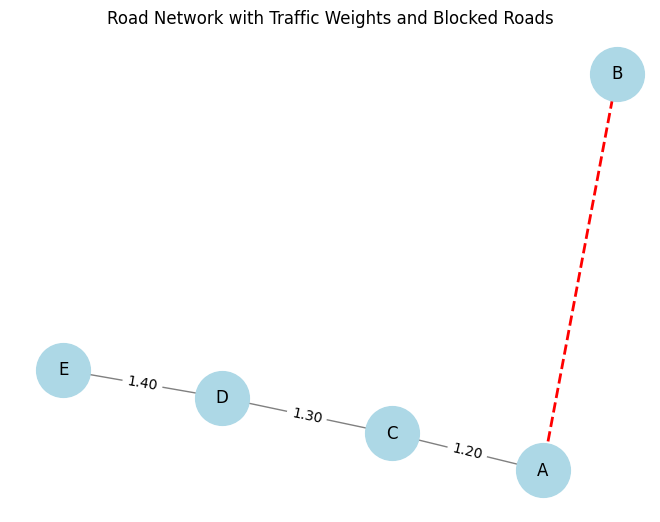

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

road_conditions = {
    ('A', 'B'): {'status': 'Blocked', 'traffic': 600},
    ('A', 'C'): {'status': 'NotBlocked', 'traffic': 200},
    ('C', 'D'): {'status': 'NotBlocked', 'traffic': 300},
    ('D', 'E'): {'status': 'NotBlocked', 'traffic': 400},
}

G = nx.Graph()
blocked_edges = []

# First add all nodes (avoid KeyError later)
nodes = set()
for (u, v) in road_conditions:
    nodes.add(u)
    nodes.add(v)
G.add_nodes_from(nodes)

# Now add edges (skipping blocked ones, but storing for drawing)
for (u, v), cond in road_conditions.items():
    if cond['status'] == 'Blocked':
        blocked_edges.append((u, v))
    else:
        traffic_weight = 1 + (cond['traffic'] / 1000)
        G.add_edge(u, v, weight=traffic_weight)

# Positions
pos = nx.spring_layout(G, seed=42)

# Draw graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, edge_color='gray', font_size=12)

# Draw edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {edge: f"{weight:.2f}" for edge, weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw blocked edges as red dashed lines
nx.draw_networkx_edges(G, pos, edgelist=blocked_edges, edge_color='red', style='dashed', width=2)

plt.title("Road Network with Traffic Weights and Blocked Roads")
plt.axis('off')
plt.show()
#All nodes (A, B, C, D, E)

#Gray edges with traffic-based weights

#Red dashed edge for ('A', 'B'), marked as blocked